The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

[+] https://www.cs.toronto.edu/~kriz/cifar.html

Step 1: Import Libraries and Load Data

    The notebook starts by importing necessary libraries and loading the CIFAR-10 dataset, which is used for image classification tasks.

Step 2: Visualize the Data

    Early in the process, a set of images from the dataset is visualized to understand the kinds of images included in the training set.

Step 3: Data Preprocessing

    The pixel values of images are rescaled by dividing by 255, a step essential for modeling because it normalizes the image data to have values between 0 and 1.
    The dataset is divided into training, validation, and test sets to prepare for effective model training and evaluation.

Step 4: Model Architecture

    A convolutional neural network (CNN) is defined using Keras. This model includes multiple convolutional layers, pooling layers, dropout layers (to prevent overfitting), and dense layers ending with a softmax activation function for multi-class classification.

Step 5: Compile and Train the Model

    The model is compiled with the Adam optimizer and categorical crossentropy as the loss function. It is trained over 20 epochs, with both training and validation metrics being monitored for performance.

Step 6: Model Evaluation

    Training and validation accuracy and loss are plotted over the epochs to visualize the learning process and identify if the model is learning effectively without overfitting.

Step 7: Save the Model

    The trained model is saved for future use, which allows the model to be deployed or further tested without the need to retrain.

Step 8: Visualize Predictions

    The model's predictions on the test set are visualized to compare predicted labels against true labels, providing a clear visual assessment of where the model performs well and where it does not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.datasets import cifar10


2024-04-30 18:00:31.134050: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 18:00:31.297743: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 18:00:32.828559: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 18:00:37.875930: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 85s 1us/step


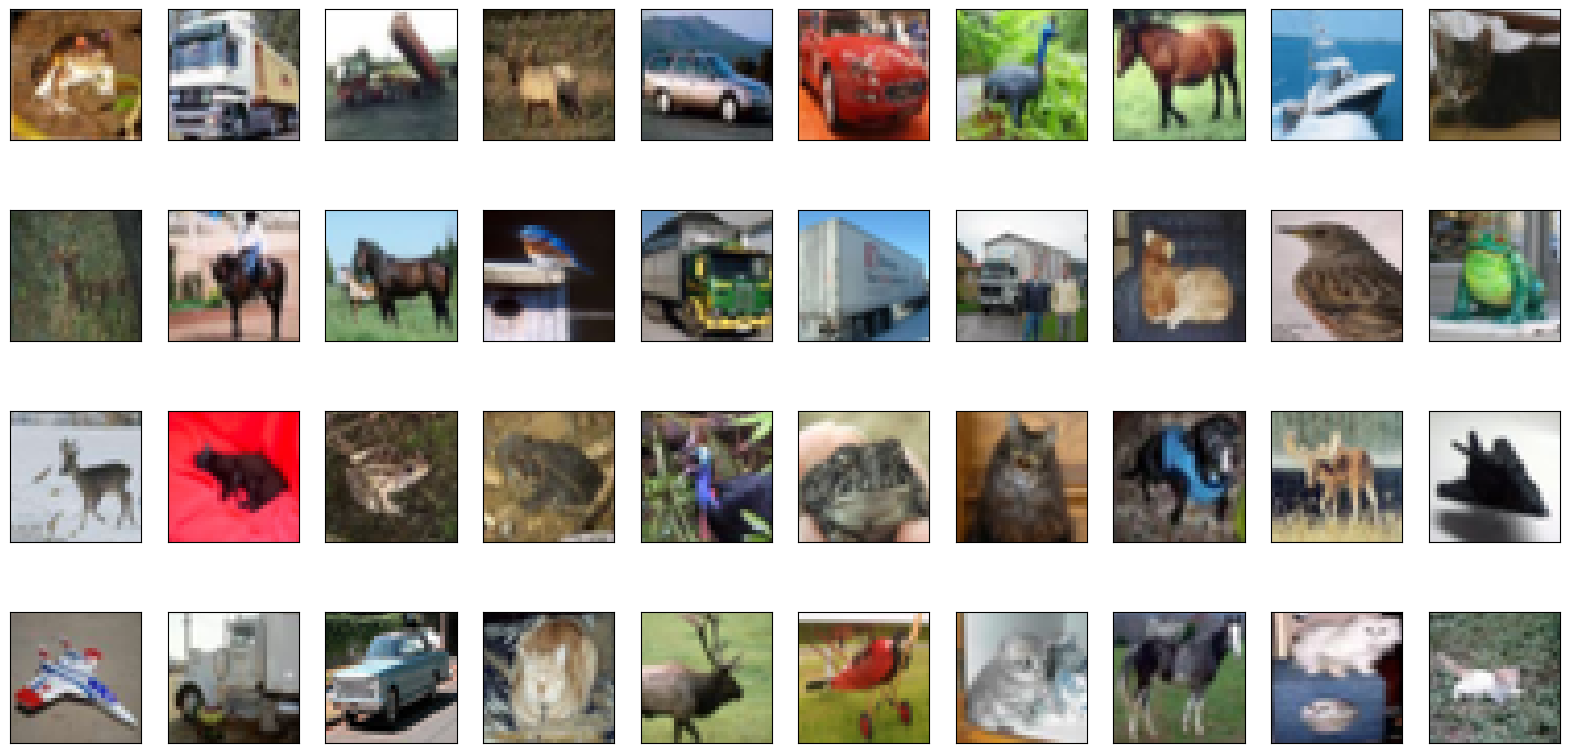

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,10))
for i in range(40):
    ax = fig.add_subplot(4, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

Rescale the Images by Dividing Every Pixel in Every Image by 255 In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

***Tip:*** When using Gradient Descent, you should ensure that all features have a similar scale to speed up training or else it will take much longer to converge.

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

**Break Dataset into Training, Testing, and Validation Sets**

In [5]:
#from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


**Define the Model Architecture**

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

/opt/conda/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       205,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,554 (849.82 KB)

 Trainable params: 217,554 (849.82 KB)

 Non-trainable params: 0 (0.00 B)

**Compile and Train the Model**

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history=model.fit(x_train, y_train,epochs=20,verbose=1,validation_data=(x_valid, y_valid),shuffle=True)

Epoch 1/20


2024-04-30 18:23:02.915836: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3255 - loss: 1.8258 - val_accuracy: 0.5388 - val_loss: 1.2946
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.5117 - loss: 1.3525 - val_accuracy: 0.6102 - val_loss: 1.1287
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.5680 - loss: 1.2126 - val_accuracy: 0.6270 - val_loss: 1.0810
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 33s 24ms/step - accuracy: 0.5942 - loss: 1.1384 - val_accuracy: 0.6396 - val_loss: 1.0262
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 0.6165 - loss: 1.0774 - val_accuracy: 0.6684 - val_loss: 0.9769
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.6330 - loss: 1.0345 - val_accuracy: 0.6834 - val_loss: 0.9104
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.6493 - loss: 0.9913 - val_accuracy: 0.6664 - val_loss: 0.9822
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.6584 - loss: 0.95

In [10]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.408022,1.615835,0.5388,1.294573
1,0.527089,1.315505,0.6102,1.128706
2,0.572156,1.200718,0.6270,1.081048
3,0.598933,1.128267,0.6396,1.026235
4,0.620400,1.070297,0.6684,0.976902
5,0.636556,1.025537,0.6834,0.910374
6,0.650867,0.990186,0.6664,0.982235
7,0.661267,0.954265,0.7008,0.862868
8,0.674578,0.923150,0.7184,0.833482
9,0.680600,0.903194,0.7192,0.825011


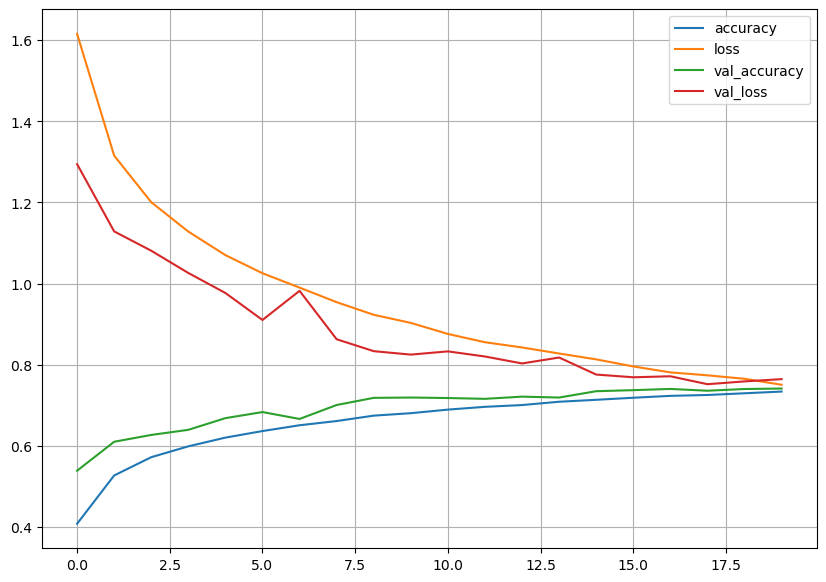

In [11]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

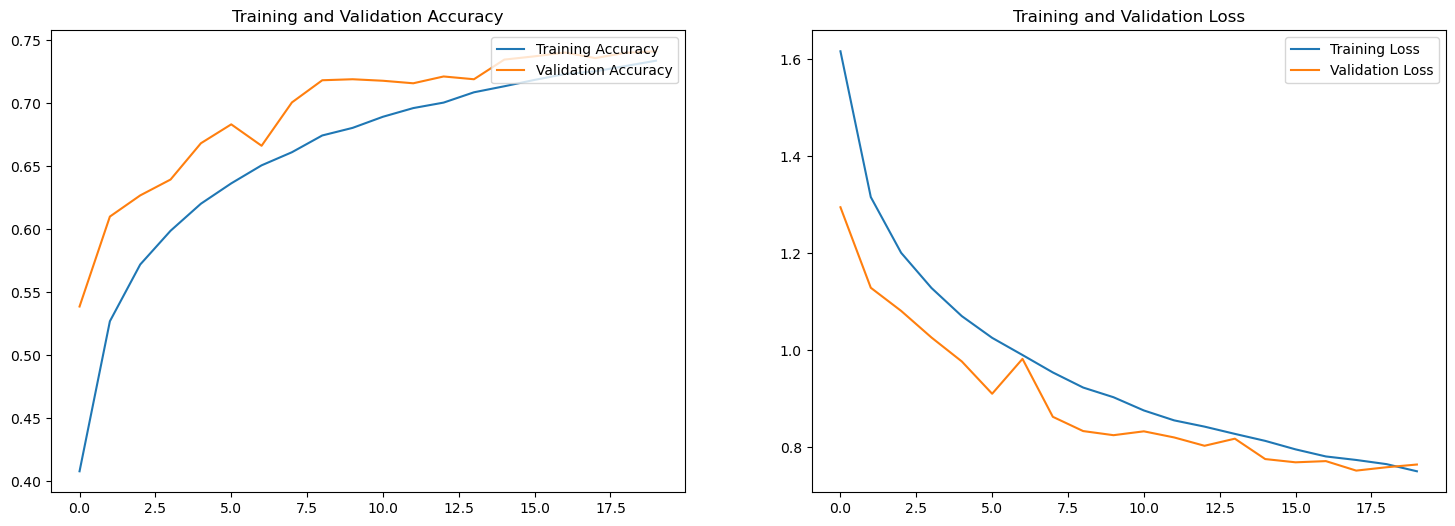

In [17]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


**Save the Model with the Best Validation Accuracy**

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('model_CNN_CIFAR.h5')

**Visualize Some Predictions**

In [19]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


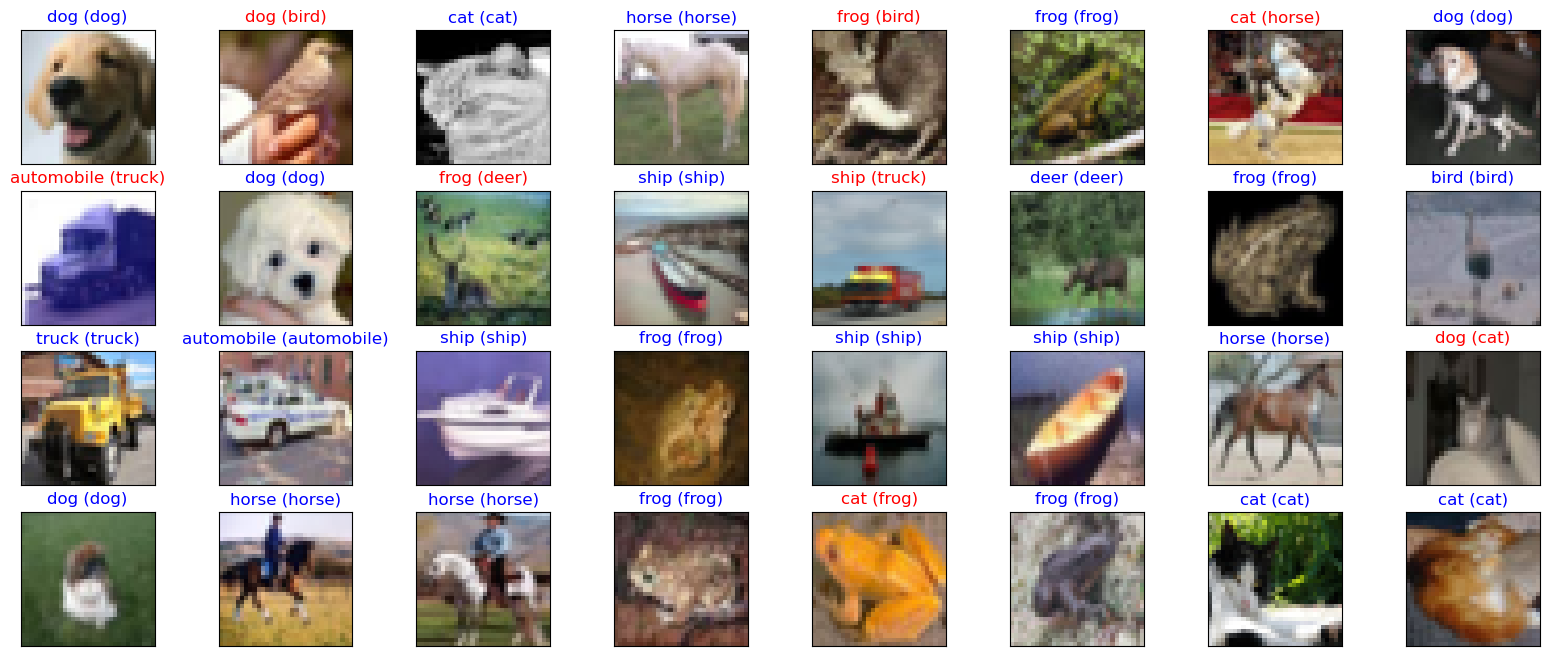

In [20]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

The CIFAR-10 classification project, utilizing a convolutional neural network model, demonstrates considerable promise in recognizing and categorizing images into predefined classes, such as 'dog', 'cat', 'ship', etc. Throughout the training process, the model achieved a final accuracy of approximately 73.63% and a validation accuracy of about 73.84%, showing a good level of consistency between training and validation, suggesting minimal overfitting.

Visual inspection of predictions versus actual labels on a subset of test images reveals that while the model is fairly proficient in classifying distinct and clear images, it struggles with those that are less visually distinct or more ambiguous. The cases where the model misclassified images often involved visually similar categories or poor image quality, which indicates areas for potential improvement.

The model's learning curve, as seen in the training and validation loss and accuracy graphs, demonstrates a gradual convergence, which is a healthy indicator of learning effectiveness. The slight fluctuations in validation loss and accuracy suggest room for enhancement, possibly through techniques such as further hyperparameter tuning, more sophisticated image augmentation, or employing a more complex neural network architecture.

In conclusion, the model shows a robust ability to generalize from the training data to unseen data, but enhancements are required to boost its performance and reliability, especially in handling visually complex scenes. Future work could explore the integration of additional regularization techniques, adjustments in the learning rate, or experimenting with different architectures like ResNets or DenseNets to refine its predictive accuracy and robustness further.